# Personality Bias in Music Recommendation dataset description
This notebook contains info and statistics about the data used in the paper "[Personality Bias in Music Recommendation]()" by Alessandro B. Melchiorre, Eva Zangerle, Markus Schedl
published at RecSys 2020.

## Dataset
The Dataset is based on microblogs shared on Twitter in the years of 2018 and 2019. In more details, we extract the listening events from the tweets containing the #nowplaying hashtag. We detect the personality of the user retrieving the 200 most recent tweets and using the [IBM personaltiy insight tool](https://cloud.ibm.com/docs/services/personality-insights?topic=personality-insights-gettingStarted). Additional info on data acquisition and processing can be found in the [paper]().

Data is contained in two files:
- **inter.csv**, containing the listening events
- **pers.csv**, containing the personality of the users

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("inter.csv")

## 1. Interaction data description
Each row describes a listening event. The number of times a row appears is the number of times a user listened to that track.

Columns are:
- **user_id**: id of the user in the context of this dataset
- **track_id**: id of the track in the context of this dataset

In [4]:
data.sample(5)

,user_id,track_id
91045,12254,11460
363349,10411,14637
263149,948,4757
42471,553,278
365072,1432,3073


In [5]:
print("The dataset contains the following:")
print("{} listening events (considering that a user could interact multiple times with a track)".format(len(data)))
print("{} unique user x track interactions (considering that a user interacts once with a track)".format(len(data[["user_id","track_id"]].drop_duplicates())))
print("{} users".format(data.user_id.nunique()))
print("{} items".format(data.track_id.nunique()))

The dataset contains the following:
395056 listening events (considering that a user could interact multiple times with a track)
333550 unique user x track interactions (considering that a user interacts once with a track)
18310 users
15753 items


### Consumption distributions
We look at 4 distributions:
- **User playcount distribution** (considers listening events)
- **Item playcount distribution** (considers listening events)
- **User unique interactions distribution**
- **Item unique interactions distribution**

---- User playcount distrbution ----

-- Stats --
count    18310.000000
mean        21.575969
std         34.344543
min          5.000000
25%          8.000000
50%         12.000000
75%         21.000000
max        950.000000
Name: user_id, dtype: float64


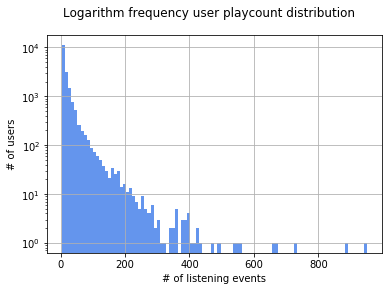

In [6]:
print("---- User playcount distrbution ----\n")
uplaycounts =  data.user_id.value_counts()
print('-- Stats --')
print(uplaycounts.describe())
# e.g. the "average" user has 21/22 listening events

uplaycounts.hist(bins=100,log=True,color='cornflowerblue')
plt.suptitle('Logarithm frequency user playcount distribution')
plt.ylabel('# of users')
_= plt.xlabel('# of listening events')

---- Track playcount distrbution ----

-- Stats --
count    15753.000000
mean        25.078144
std         33.115417
min          8.000000
25%         11.000000
50%         16.000000
75%         26.000000
max        986.000000
Name: track_id, dtype: float64


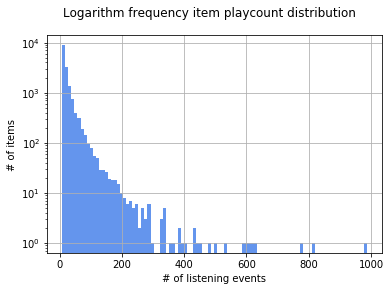

In [7]:
print("---- Track playcount distrbution ----\n")
tplaycounts =  data.track_id.value_counts()
print('-- Stats --')
print(tplaycounts.describe())
# e.g. the "average" item has been listened 25 times

tplaycounts.hist(bins=100,log=True,color='cornflowerblue')
plt.suptitle('Logarithm frequency item playcount distribution')
plt.ylabel('# of items')
_= plt.xlabel('# of listening events')

---- User unique interactions distrbution ----

-- Stats --
count    18310.000000
mean        18.216821
std         23.111750
min          5.000000
25%          7.000000
50%         11.000000
75%         19.000000
max        334.000000
Name: user_id, dtype: float64


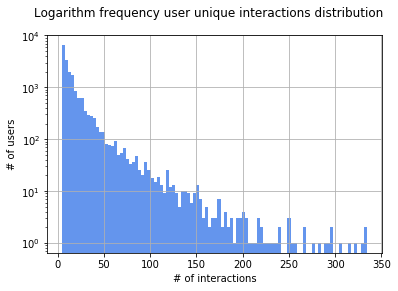

In [8]:
print("---- User unique interactions distrbution ----\n")
unuplaycounts =  data.drop_duplicates().user_id.value_counts()
print('-- Stats --')
print(unuplaycounts.describe())


unuplaycounts.hist(bins=100,log=True,color='cornflowerblue')
plt.suptitle('Logarithm frequency user unique interactions distribution')
plt.ylabel('# of users')
_= plt.xlabel('# of interactions')

---- Item unique interactions distrbution ----

-- Stats --
count    15753.000000
mean        21.173745
std         25.588050
min          8.000000
25%         10.000000
50%         14.000000
75%         23.000000
max        744.000000
Name: track_id, dtype: float64


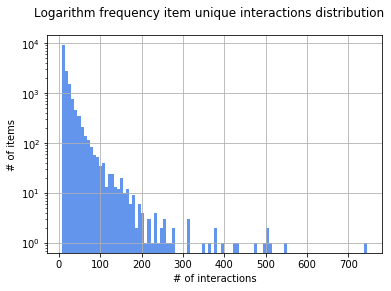

In [9]:
print("---- Item unique interactions distrbution ----\n")
untplaycounts =  data.drop_duplicates().track_id.value_counts()
print('-- Stats --')
print(untplaycounts.describe())


untplaycounts.hist(bins=100,log=True,color='cornflowerblue')
plt.suptitle('Logarithm frequency item unique interactions distribution')
plt.ylabel('# of items')
_= plt.xlabel('# of interactions')

### Most popular artists and tracks
(in terms of listening events)

In [10]:
dict_track = pd.read_csv('track_ids.csv')
data_track = data.merge(dict_track)

In [11]:
print("\n### Most popular artists ###\n")
print(data_track.artist.value_counts()[:20])
print("\n### Most popular tracks ###\n")
print(data_track.track_artist.value_counts()[:20])


### Most popular artists ###

Drake             10099
Kendrick Lamar     7990
Kanye West         4707
Future             4522
Ed Sheeran         3689
The Weeknd         3307
BTS                3295
Beyoncé            3122
Jay-Z              2919
Prince             2855
Nicki Minaj        2729
Frank Ocean        2714
Chris Brown        2695
J. Cole            2379
JAY-Z              2250
Travis Scott       2247
Linkin Park        2159
Rihanna            2127
Rick Ross          2101
2Pac               2082
Name: artist, dtype: int64

### Most popular tracks ###

Shape of You;Ed Sheeran            986
Enter the Dreamland;Meresha        815
4:44;JAY-Z                         775
Shining;DJ Khaled                  629
Redbone;Childish Gambino           620
LOVE.;Kendrick Lamar               614
Slide;Calvin Harris                598
Humble;Kendrick Lamar              594
Loyalty;Kendrick Lamar             528
Passionfruit;Drake                 498
Mask Off;Future                    478
DNA

### Most shared artists and tracks
(in terms of unique interactions)

In [12]:
print("\n### Most shared artists ###\n")
print(data_track.drop_duplicates(subset=["user_id","track_id"]).artist.value_counts()[:20])
print("\n### Most shared tracks ###\n")
print(data_track.drop_duplicates(subset=["user_id","track_id"]).track_artist.value_counts()[:20])


### Most shared artists ###

Drake             8562
Kendrick Lamar    6815
Kanye West        4175
Future            3801
Ed Sheeran        3015
The Weeknd        2680
Beyoncé           2600
Jay-Z             2549
Prince            2330
Frank Ocean       2296
J. Cole           2082
Chris Brown       2041
Nicki Minaj       2026
BTS               2008
Linkin Park       1912
Travis Scott      1841
Rihanna           1821
Rick Ross         1741
JAY-Z             1740
2Pac              1703
Name: artist, dtype: int64

### Most shared tracks ###

Shape of You;Ed Sheeran            744
4:44;JAY-Z                         546
Slide;Calvin Harris                513
Redbone;Childish Gambino           508
Shining;DJ Khaled                  502
Humble;Kendrick Lamar              497
LOVE.;Kendrick Lamar               478
Loyalty;Kendrick Lamar             430
Passionfruit;Drake                 427
DNA.;Kendrick Lamar                391
Mask Off;Future                    378
The Heart Part 4;Kendrick

***

## 2. Personality data description
Each row represent the personality profile of a user. Personality is expressed through the [OCEAN model](https://en.wikipedia.org/wiki/Big_Five_personality_traits).

Columns are:
- **user_id**: id of the user
- **agr**: Agreeablness
- **con**: Conscientiousness
- **ext**: Extraversion
- **neu**: Neuroticism
- **ope**: Openness to experience

In [15]:
pers = pd.read_csv("pers.csv",index_col='user_id')
pers.sample(5)

,agr,con,ext,neu,ope
user_id,,,,,
9763,0.405426,0.084814,0.305881,0.711699,0.583300
15510,0.746768,0.077412,0.951510,0.100129,0.784264
10086,0.032021,0.055117,0.089272,0.892322,0.563861
7553,0.611219,0.113713,0.046594,0.745982,0.320968
6180,0.754709,0.132019,0.675012,0.333898,0.578518


### Plotting distribution of the traits over the users

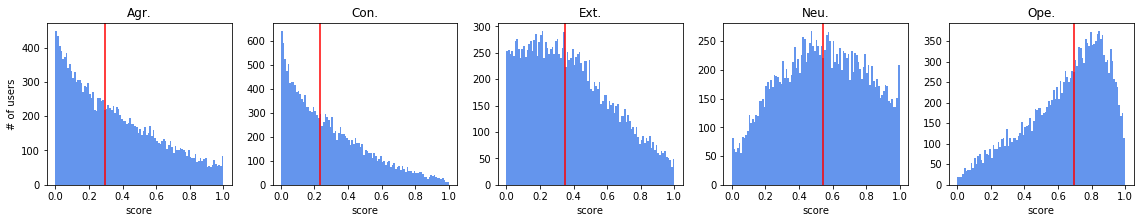

In [24]:
fig, axes = plt.subplots(1,5,figsize=(16,3.2))
for i,(col,name) in enumerate(zip(pers.columns,['Agr.','Con.','Ext.','Neu.','Ope.'])):
    axes[i].hist(pers[col],range=(0,1),bins=100,color='cornflowerblue')
    axes[i].set_title(name)
    axes[i].axvline(x=pers[col].median(),color='r')

axes[0].set(xlabel='score', ylabel='# of users')
for i in range(1,5):
    axes[i].set(xlabel='score')
plt.tight_layout()
plt.show()
#plt.savefig('traits_plots.png')

### Differences in listening events between different personality groups

****** STATISTICS FOR TRAIT agr ******
Median value is 0.2955526455729136


### Listening events stats ###
Low  group shared 187002 listening events
High group shared 208054 listening events
         low_group   high_group
count  9155.000000  9155.000000
mean     20.426215    22.725724
std      32.611237    35.959522
min       5.000000     5.000000
25%       7.000000     8.000000
50%      11.000000    12.000000
75%      20.000000    23.000000
max     884.000000   950.000000


### Tracks stats ###
Low  group shared 15664 (or covered 99.0 %) (unique) tracks
High group shared 15694 (or covered 100.0 %) (unique) tracks
         low_group   high_group
count  9155.000000  9155.000000
mean     17.317204    19.116439
std      21.700196    24.409978
min       5.000000     5.000000
25%       7.000000     7.000000
50%      10.000000    11.000000
75%      18.000000    20.000000
max     334.000000   330.000000
Trait agr - blue low, orange high


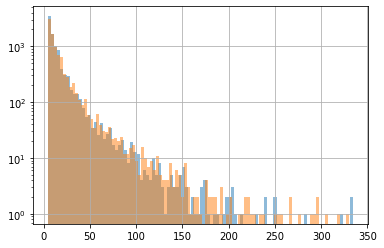





****** STATISTICS FOR TRAIT con ******
Median value is 0.23084260407096746


### Listening events stats ###
Low  group shared 188877 listening events
High group shared 206179 listening events
         low_group   high_group
count  9155.000000  9155.000000
mean     20.631021    22.520918
std      32.690853    35.899111
min       5.000000     5.000000
25%       8.000000     8.000000
50%      11.000000    12.000000
75%      21.000000    22.000000
max     950.000000   725.000000


### Tracks stats ###
Low  group shared 15695 (or covered 100.0 %) (unique) tracks
High group shared 15674 (or covered 99.0 %) (unique) tracks
         low_group   high_group
count  9155.000000  9155.000000
mean     17.237357    19.196286
std      20.439521    25.469029
min       5.000000     5.000000
25%       7.000000     7.000000
50%      11.000000    11.000000
75%      19.000000    20.000000
max     306.000000   334.000000
Trait con - blue low, orange high


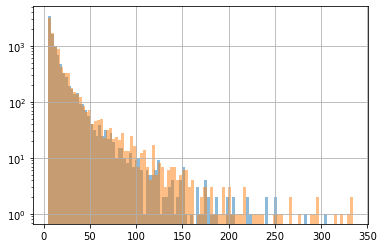





****** STATISTICS FOR TRAIT ext ******
Median value is 0.35057513092734843


### Listening events stats ###
Low  group shared 177161 listening events
High group shared 217895 listening events
         low_group   high_group
count  9155.000000  9155.000000
mean     19.351283    23.800655
std      27.331297    40.029049
min       5.000000     5.000000
25%       7.000000     8.000000
50%      11.000000    12.000000
75%      20.000000    23.000000
max     427.000000   950.000000


### Tracks stats ###
Low  group shared 15672 (or covered 99.0 %) (unique) tracks
High group shared 15655 (or covered 99.0 %) (unique) tracks
         low_group   high_group
count  9155.000000  9155.000000
mean     16.443364    19.990279
std      19.223310    26.316111
min       5.000000     5.000000
25%       7.000000     7.000000
50%      10.000000    11.000000
75%      18.000000    21.000000
max     282.000000   334.000000
Trait ext - blue low, orange high


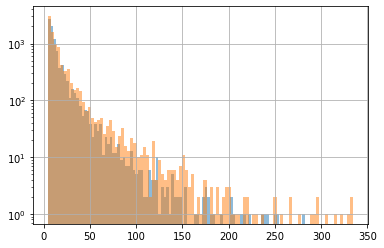





****** STATISTICS FOR TRAIT neu ******
Median value is 0.5404112630199235


### Listening events stats ###
Low  group shared 217164 listening events
High group shared 177892 listening events
         low_group   high_group
count  9155.000000  9155.000000
mean     23.720808    19.431131
std      37.686097    30.492303
min       5.000000     5.000000
25%       8.000000     7.000000
50%      12.000000    11.000000
75%      23.000000    20.000000
max     725.000000   950.000000


### Tracks stats ###
Low  group shared 15607 (or covered 99.0 %) (unique) tracks
High group shared 15429 (or covered 98.0 %) (unique) tracks
         low_group   high_group
count  9155.000000  9155.000000
mean     20.254506    16.179137
std      26.894210    18.351037
min       5.000000     5.000000
25%       7.000000     7.000000
50%      11.000000    10.000000
75%      21.000000    18.000000
max     334.000000   306.000000
Trait neu - blue low, orange high


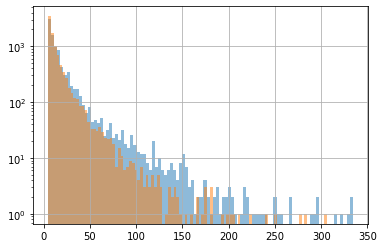





****** STATISTICS FOR TRAIT ope ******
Median value is 0.6937518722388012


### Listening events stats ###
Low  group shared 185315 listening events
High group shared 209741 listening events
         low_group   high_group
count  9155.000000  9155.000000
mean     20.241944    22.909995
std      32.554878    35.997839
min       5.000000     5.000000
25%       8.000000     8.000000
50%      11.000000    12.000000
75%      20.000000    23.000000
max     950.000000   884.000000


### Tracks stats ###
Low  group shared 15619 (or covered 99.0 %) (unique) tracks
High group shared 15652 (or covered 99.0 %) (unique) tracks
         low_group   high_group
count  9155.000000  9155.000000
mean     16.902676    19.530967
std      21.135218    24.863881
min       5.000000     5.000000
25%       7.000000     7.000000
50%      11.000000    11.000000
75%      18.000000    21.000000
max     317.000000   334.000000
Trait ope - blue low, orange high


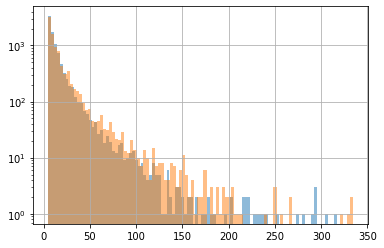

In [25]:
columns = pers.columns
alll = []
for col in columns:
    med = pers[col].median()
    low = pers[pers[col] < med].index
    high = pers[pers[col] >= med].index
    data_low = data[data.user_id.isin(low)][["user_id","track_id"]]
    data_high = data[data.user_id.isin(high)][["user_id","track_id"]]
    # playcounts information
    data_low["low_group"] = 1
    data_high["high_group"] = 1
    
    les_low = data_low.groupby("user_id")["low_group"].sum()
    les_high = data_high.groupby("user_id")["high_group"].sum()
    
    tks_low = data_low.drop_duplicates().groupby("user_id")["low_group"].sum()
    tks_high = data_high.drop_duplicates().groupby("user_id")["high_group"].sum()
    
    print("****** STATISTICS FOR TRAIT {} ******".format(col))
    print("Median value is {}".format(med))
    print("\n")
    print("### Listening events stats ###")
    print("Low  group shared {} listening events".format(les_low.sum()))
    print("High group shared {} listening events".format(les_high.sum()))
    print(pd.concat([les_low.describe(),les_high.describe()],axis=1))
    print("\n")
    print("### Tracks stats ###")
    print("Low  group shared {} (or covered {} %) (unique) tracks".format(data_low.track_id.nunique(),round(data_low.track_id.nunique()/data.track_id.nunique(),2)*100))
    print("High group shared {} (or covered {} %) (unique) tracks".format(data_high.track_id.nunique(),round(data_high.track_id.nunique()/data.track_id.nunique(),2)*100))
    print(pd.concat([tks_low.describe(),tks_high.describe()],axis=1))
    alll.append(pd.concat([tks_low.describe(),tks_high.describe()],axis=1))

    print('Trait {} - blue low, orange high'.format(col))
    tks_low.hist(bins=100,log=True,alpha=0.5,)
    tks_high.hist(bins=100,log=True,alpha=0.5)
    plt.show()
    
    print("\n")
    print("\n")